# Assigment 3: Data Mining In Action

## Initial Data Exploration and PreProcessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#TrainAndTestSet
TrainTest_Set = pd.read_csv('Assignment3-WeatherData.csv')

#Real Datset to be predicted
RealSample = pd.read_csv('Assignment3-UnknownData.csv')

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'RainToday' column
TrainTest_Set['RainToday'] = label_encoder.fit_transform(TrainTest_Set['RainToday'])

#Binarisation For Locationsfhfhf
TrainTest_Set = pd.get_dummies(TrainTest_Set)

In [2]:
imputer = KNNImputer(n_neighbors=5)
TrainTest_Set_Imputed = imputer.fit_transform(TrainTest_Set)


In [5]:
TrainTest_Set_Imputed = pd.DataFrame(TrainTest_Set_Imputed, columns=TrainTest_Set.columns)

In [6]:
TrainTest_Set_Imputed[]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.9,25.7,0.0,6.50,7.76,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.2,28.0,0.0,9.32,8.28,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.5,32.3,1.0,7.40,8.14,41.0,7.0,20.0,82.0,33.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.7,31.9,0.0,10.28,8.40,80.0,7.0,28.0,42.0,9.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.1,30.1,1.4,6.24,8.14,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51194,2.4,19.1,0.0,3.30,4.20,33.0,17.0,17.0,59.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51195,5.1,19.7,0.0,3.06,3.80,46.0,13.0,17.0,56.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51196,2.3,21.4,0.0,3.94,4.94,22.0,11.0,7.0,60.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51197,5.2,24.3,0.0,4.62,6.58,24.0,11.0,11.0,53.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Classifiers

### Decision Tree Classifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



X = TrainTest_Set_Imputed.drop('RainTomorrow', axis=1)
y = TrainTest_Set_Imputed['RainTomorrow']
test_size = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_seed)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

#### Model Evaluation

In [37]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [38]:
y_pred = model.predict(X_test)

Accuracy : 0.78046875
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7916
         1.0       0.52      0.52      0.52      2324

    accuracy                           0.78     10240
   macro avg       0.69      0.69      0.69     10240
weighted avg       0.78      0.78      0.78     10240



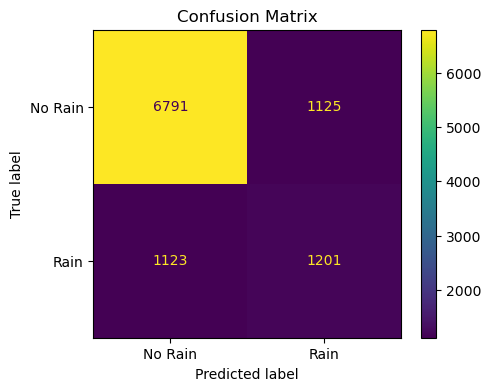

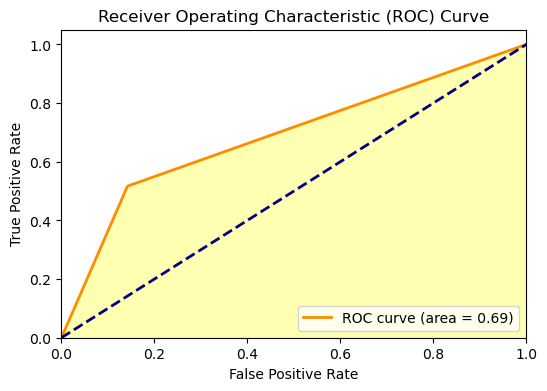

In [39]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Output Results
print(f'Accuracy : {accuracy}')
print(class_report)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()

def plot_roc_curve(y_test, y_pred_prob):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.fill_between(fpr, tpr, color='yellow', alpha=0.3)

    # Plot a diagonal line (chance curve)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


y_pred_prob = model.predict_proba(X_test)[:,1]

plot_roc_curve(y_test, y_pred_prob)


In [27]:
#predict real values
RealX = RealSample.drop(RealSample.columns[0], axis=1)
model.predict(RealX) 



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Location
- WindDir3pm
- WindDir9am
- WindGustDir
Feature names seen at fit time, yet now missing:
- Location_Adelaide
- Location_Albany
- Location_Albury
- Location_AliceSprings
- Location_BadgerysCreek
- ...


### K Nearest Neighbour

### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

forrest_model = RandomForestClassifier(n_estimators=100, random_state=42)

forrest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [170]:
y_pred= forrest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Accuracy : 0.8486328125
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7916
           1       0.75      0.49      0.60      2324

    accuracy                           0.85     10240
   macro avg       0.81      0.72      0.75     10240
weighted avg       0.84      0.85      0.84     10240



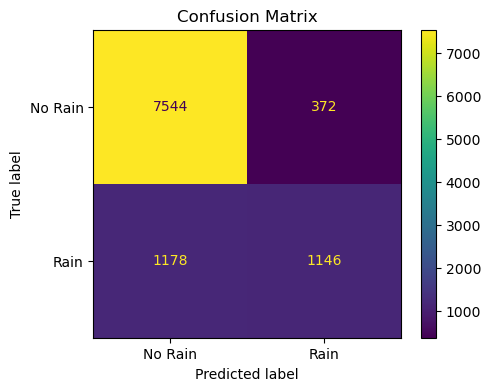

In [171]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Output Results
print(f'Accuracy : {accuracy}')
print(class_report)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()


### Support Vector Machine

In [9]:
TrainTest_Set_Imputed['RainTomorrow']

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
51194    0.0
51195    0.0
51196    0.0
51197    0.0
51198    0.0
Name: RainTomorrow, Length: 51199, dtype: float64

### Neural Network

In [15]:
import pandas as pd

# Assuming 'real' is your original DataFrame
# Step 1: Filter the rows where raintommorow is 1
rain_true = TrainTest_Set_Imputed[TrainTest_Set_Imputed['RainTomorrow'] == 1]

# Step 2: Determine the number of true rows and calculate the number of false rows needed
num_true = len(rain_true)
num_false = int(num_true * (0.40 / 0.60))  # 40% of the true rows

# Step 3: Sample the rows where raintommorow is 0
rain_false = TrainTest_Set_Imputed[TrainTest_Set_Imputed['RainTomorrow'] == 0]
sampled_rain_false = rain_false.sample(n=num_false, random_state=42)

# Step 4: Combine the sampled rows
new_dataset = pd.concat([rain_true, sampled_rain_false])

# Optional: Shuffle the new dataset
new_dataset = new_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Now 'new_dataset' contains the desired ratio of 60:40
new_dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,6.20,17.10,0.00,5.50,4.94,22.0,11.0,6.0,65.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.60,20.00,0.00,11.30,5.00,50.0,19.0,22.0,85.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,22.80,36.80,0.00,13.20,9.80,65.0,24.0,41.0,46.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.16,27.76,14.44,3.76,3.60,46.2,6.0,8.6,90.0,78.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.30,23.00,2.00,3.20,7.10,28.0,4.0,13.0,84.0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19113,26.00,31.50,1.20,3.00,1.80,57.0,11.0,22.0,86.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19114,12.30,23.00,0.00,8.00,5.30,44.0,20.0,28.0,60.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19115,13.20,21.00,0.00,4.00,0.40,26.0,9.0,13.0,76.0,72.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19116,11.80,18.10,109.40,4.20,6.44,91.0,30.0,35.0,85.0,60.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
X_new = new_dataset.drop('RainTomorrow', axis=1)
y_new = new_dataset['RainTomorrow']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',  # or you can use a float like 0.5
    bootstrap=True,
    oob_score=True,
    random_state=42
)
rf_clf.fit(X_train_new,y_train_new)
y_pred_new = rf_clf.predict(X_test_new)

Accuracy = accuracy_score(y_test_new, y_pred_new)
print(Accuracy)


0.7975941422594143


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
26106,14.6,27.3,0.0,NaN,NaN,56.0,17.0,30.0,46.0,26.0,...,True,False,False,False,False,False,False,False,False,False
40406,21.4,36.8,0.0,NaN,12.0,65.0,24.0,22.0,38.0,14.0,...,False,False,False,False,False,False,False,False,False,False
10727,17.3,26.4,0.6,10.2,12.2,NaN,7.0,30.0,67.0,58.0,...,False,False,False,True,False,False,False,False,False,False
33304,22.8,30.1,7.0,7.6,1.4,59.0,20.0,35.0,83.0,65.0,...,False,False,False,False,False,False,False,False,False,False
34465,16.2,23.6,0.4,NaN,4.1,61.0,20.0,30.0,78.0,59.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.5,16.3,0.2,6.4,10.1,54.0,24.0,31.0,49.0,29.0,...,False,False,False,False,False,False,False,False,True,False
44732,11.7,24.8,0.0,NaN,NaN,44.0,17.0,28.0,65.0,59.0,...,False,False,False,True,False,False,False,False,False,False
38158,13.4,21.0,0.8,6.6,13.3,NaN,6.0,30.0,58.0,60.0,...,False,False,False,False,False,False,True,False,False,False
860,16.6,21.6,6.6,NaN,NaN,39.0,19.0,17.0,76.0,83.0,...,False,False,False,False,False,False,False,False,False,False


In [35]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
26106,14.6,27.3,0.0,NaN,NaN,56.0,17.0,30.0,46.0,26.0,...,True,False,False,False,False,False,False,False,False,False
40406,21.4,36.8,0.0,NaN,12.0,65.0,24.0,22.0,38.0,14.0,...,False,False,False,False,False,False,False,False,False,False
10727,17.3,26.4,0.6,10.2,12.2,NaN,7.0,30.0,67.0,58.0,...,False,False,False,True,False,False,False,False,False,False
33304,22.8,30.1,7.0,7.6,1.4,59.0,20.0,35.0,83.0,65.0,...,False,False,False,False,False,False,False,False,False,False
34465,16.2,23.6,0.4,NaN,4.1,61.0,20.0,30.0,78.0,59.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.5,16.3,0.2,6.4,10.1,54.0,24.0,31.0,49.0,29.0,...,False,False,False,False,False,False,False,False,True,False
44732,11.7,24.8,0.0,NaN,NaN,44.0,17.0,28.0,65.0,59.0,...,False,False,False,True,False,False,False,False,False,False
38158,13.4,21.0,0.8,6.6,13.3,NaN,6.0,30.0,58.0,60.0,...,False,False,False,False,False,False,True,False,False,False
860,16.6,21.6,6.6,NaN,NaN,39.0,19.0,17.0,76.0,83.0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(weights='distance',n_neighbors=20)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {Accuracy}')
      

Accuracy: 0.84111328125


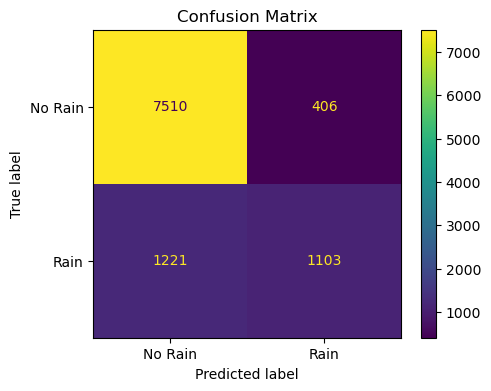

In [57]:
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()
